In [2]:
### Regole di stile

In [2]:
%%html
<style type="text/css">
h1 {
    color:#000;
    font: 0 sans-serif;
    border-top: 5px solid #CFB4A6;
    padding-top: 10px;
    
}
table {
    float:left
}
</style>

# Dynamic Community Discover

In [3]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import warnings
import json
import numpy as np
import powerlaw
import cdlib
from cdlib import algorithms, evaluation, TemporalClustering, viz
import dynetx as dn
import random
import matplotlib.patches as mpatchesclassification
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from collections import OrderedDict
from tabulate import tabulate
%run Utilyties.ipynb
%run Communities_lib.ipynb

## Snapshots temporali e visualizzaione delle evoluzioni con un singolo algoritmo

`Ranges` è una lista con al suo interno delle liste contenti le date di quel range.
Serve per creare gli snapshots della rete sulla base dei frammenti temporali scelti.

In [4]:
ranges = [
    ['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14'], # Italia - Turchia (1)
    ['2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19'], # Italia - Svizzera (2)
    ['2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24'], # Italia - Galles (3)
    ['2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29'], # Italia - Austria (4)
    ['2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04'], # Italia - Belgio (5)
    ['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09'], # Italia - Spagna (6)
    ['2021-07-10', '2021-07-11', '2021-07-12'],                             # Italia - Inghilterra (7)
]

snapshots = get_snapshot("../data/final/data_complete.json", ranges)

In [5]:
algorithm = "louvain"
G, matches, coms, coms_nodes, net_growth, time, tc = dynamic_network_communities(snapshots, ranges, algorithm)

--->	louvain	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 3)--- 

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 4)--- 

--- Network dal: 2021-06-30 al 2021-07-04 (Tempo 5)--- 

--- Network dal: 2021-07-05 al 2021-07-09 (Tempo 6)--- 

--- Network dal: 2021-07-10 al 2021-07-12 (Tempo 7)--- 



In [18]:
trend = tc.clustering_stability_trend(evaluation.nf1)
trend

[0.6665810032894737,
 0.023738532110091748,
 0.019491499553462695,
 0.7995028726996198,
 0.8819663869595894,
 0.8634072074843009]

In [19]:
tc . has_explicit_match ()

False

In [23]:
community_evolution("1_6")

{'1_6/simple': [('1_6', '2_6', 1.0)],
 '2_6/simple': [('2_6', '3_18', 0.125)],
 '3_18/simple': [('3_18', '4_4', 0.029940119760479042)],
 '4_4/split': [('4_4', '5_16', 0.23764458464773922),
  ('4_4', '5_7', 0.5091463414634146)],
 '5_16/split': [('5_16', '6_23', 0.1876750700280112),
  ('5_16', '6_16', 0.594170403587444)],
 '5_7/simple': [('5_7', '6_6', 0.5109211775878443)],
 '6_16/simple': [('6_16', '7_14', 0.8)],
 '6_23/simple': [('6_23', '7_22', 0.8172043010752689)],
 '6_6/split': [('6_6', '7_31', 0.0106951871657754),
  ('6_6', '7_27', 0.014973262032085561),
  ('6_6', '7_8', 0.5830721003134797)]}

************** [ TEMPO 1  ---> TEMPO  2  ] **************
2_4 --> 0.1488536155202822
La comunità 1_2 CRESCE di 1 e diventa la comunità 2_4


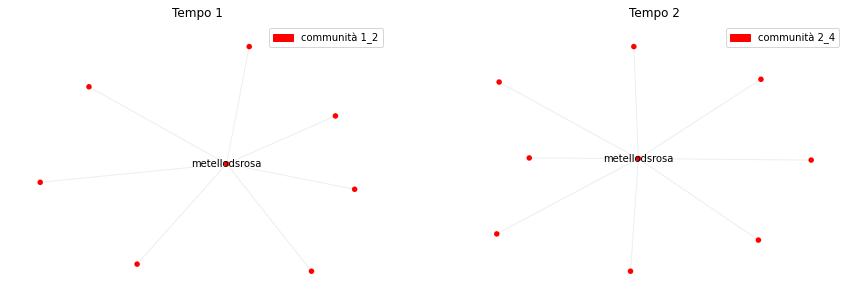

************** [ TEMPO 2  ---> TEMPO  3  ] **************
3_8 --> 0.7647623397495821
La comunità 2_4 CRESCE di 150 e diventa la comunità 3_8


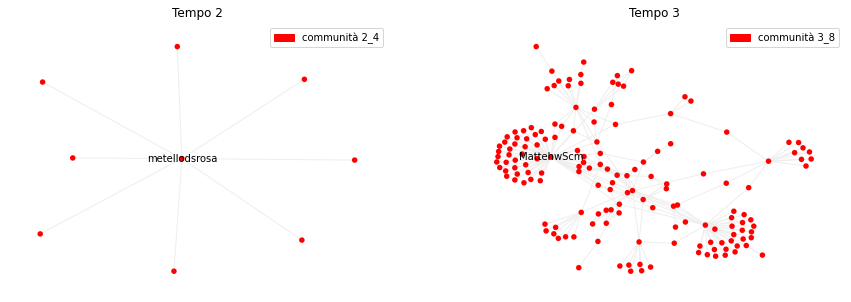

************** [ TEMPO 3  ---> TEMPO  4  ] **************
4_17 --> -0.6315370531374714
4_0 --> 1.6241394291067441
Comunita 3_8 al tempo 4 si splitta in 2 comunità.


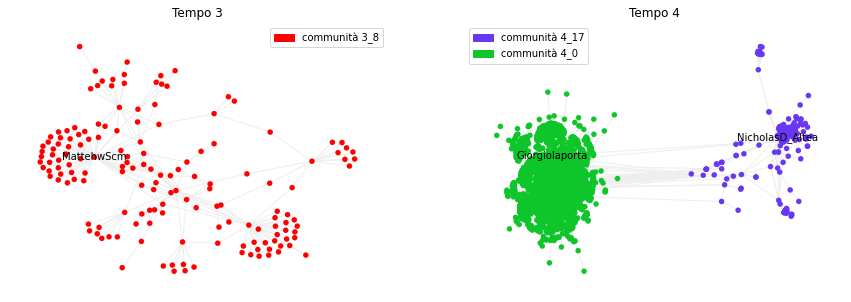

************** [ TEMPO 4  ---> TEMPO  5  ] **************
5_0 --> 1.554337960401156
5_78 --> 3.0
Comunita 4_0 al tempo 5 si splitta in 2 comunità.


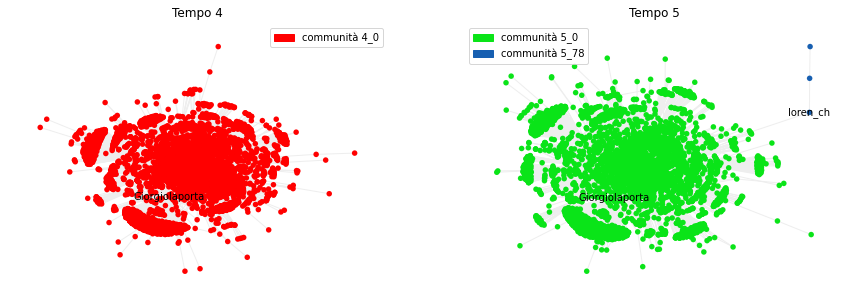

5_17 --> -0.6565693721592599
La comunità 4_17 CRESCE di 28 e diventa la comunità 5_17


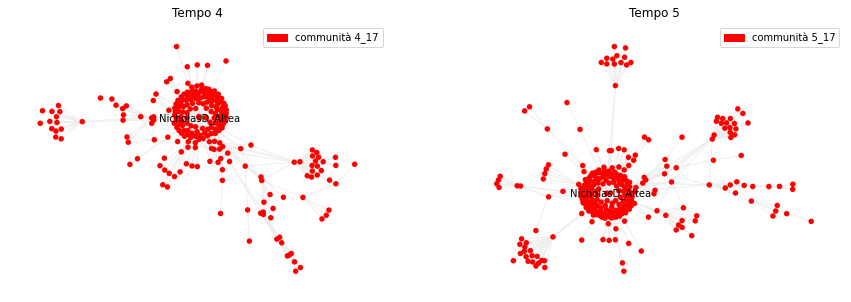

************** [ TEMPO 5  ---> TEMPO  6  ] **************
6_0 --> 1.5065773683832153
La comunità 5_0 DECRESCE di -1257 e diventa la comunità 6_0


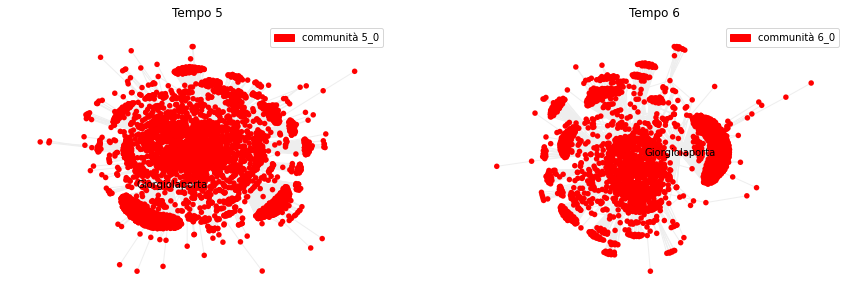

6_10 --> -1.2169718772622817
La comunità 5_17 CRESCE di 327 e diventa la comunità 6_10


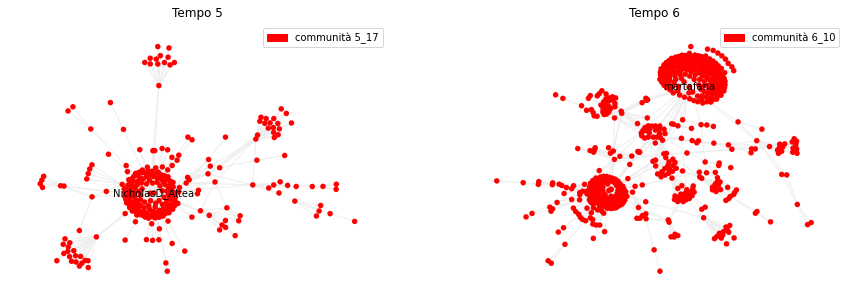

6_1 --> 1.710508623799478
La comunità 5_78 CRESCE di 1427 e diventa la comunità 6_1


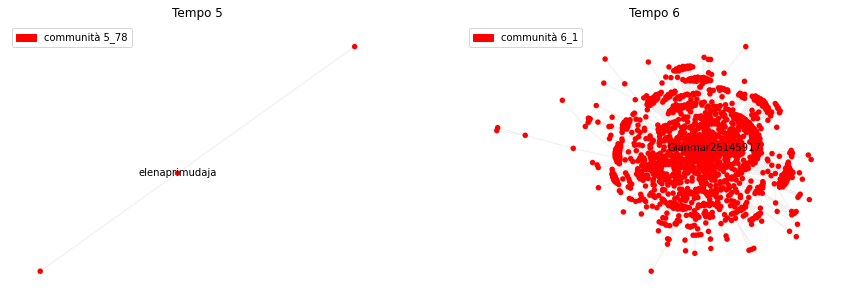

************** [ TEMPO 6  ---> TEMPO  7  ] **************
6_0 --> 1.5065773683832153
6_1 --> 1.710508623799478
Le comunità 6_0, 6_1,  al tempo 6
Le comunità 6_0, 6_1,  al tempo 7 si uniscono nella comunità 7_0


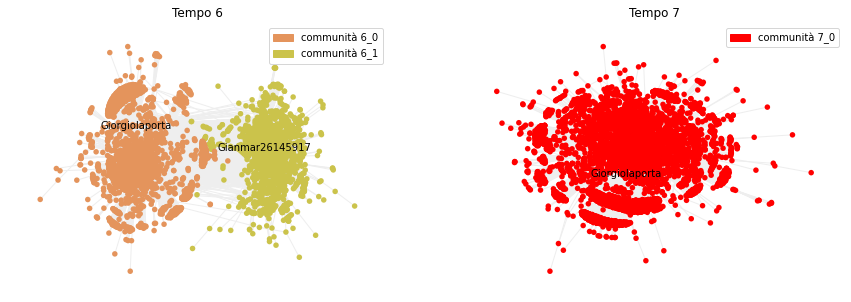

7_0 --> 1.516023665645922
La comunità 6_0 CRESCE di 1686 e diventa la comunità 7_0


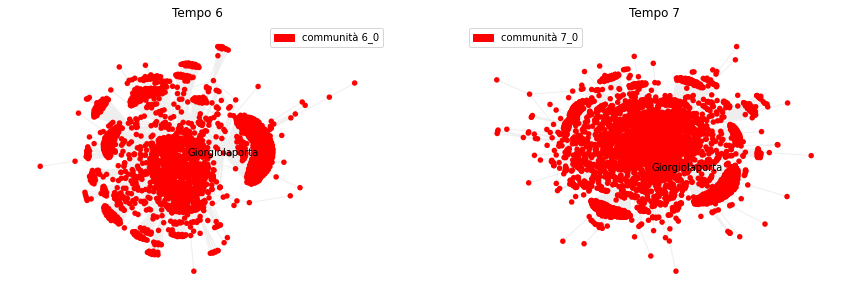

7_0 --> 1.516023665645922
La comunità 6_1 CRESCE di 2395 e diventa la comunità 7_0


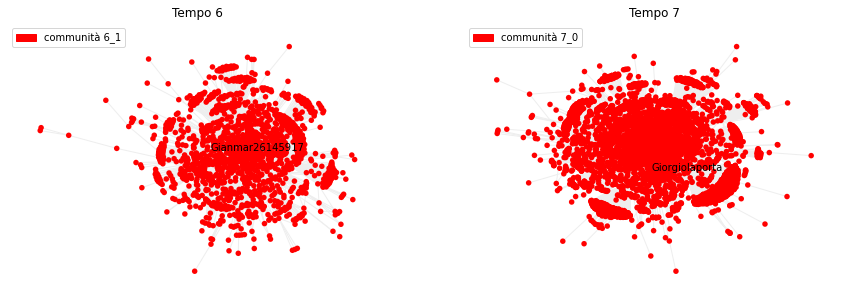

7_24 --> -0.8488488488488488
7_10 --> -1.3639161746059985
Comunita 6_10 al tempo 7 si splitta in 2 comunità.


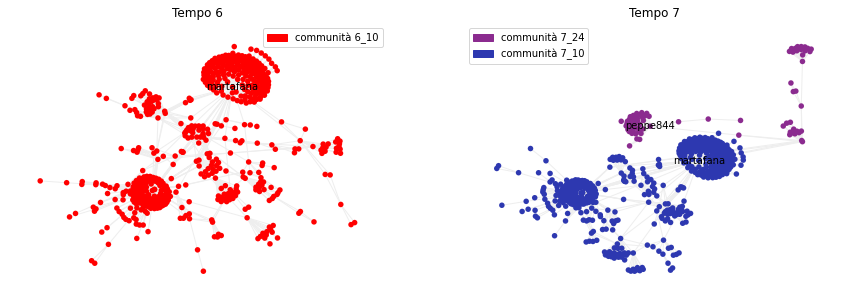

In [25]:
viz_communities_evolution("1_2")

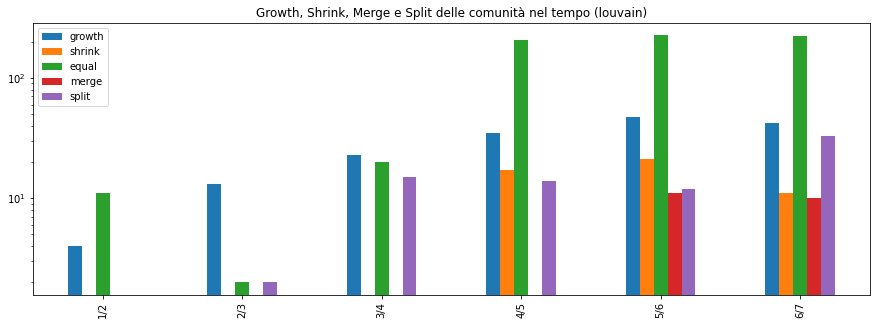

In [22]:
xAxes=["1/2","2/3","3/4","4/5","5/6","6/7"]
title = "Growth, Shrink, Merge e Split delle comunità nel tempo"
viz_events_graph(matches, len(ranges), title, xAxes, algorithm)

## Studio di tutti algoritmi

### > Set Up dei vari algoritmi

In [6]:
LO_G, LO_matches, LO_coms, LO_coms_nodes, net_growth, time, LO_tc = dynamic_network_communities(snapshots, ranges, "louvain")
LP_G, LP_matches, LP_coms, LP_coms_nodes, net_growth, time, LP_tc = dynamic_network_communities(snapshots, ranges, "label-propagation")
AN_G, AN_matches, AN_coms, AN_coms_nodes, net_growth, time, AN_tc = dynamic_network_communities(snapshots, ranges, "angel")
DE_G, DE_matches, DE_coms, DE_coms_nodes, net_growth, time, DE_tc = dynamic_network_communities(snapshots, ranges, "demon")
WP_G, WP_matches, WP_coms, WP_coms_nodes, net_growth, time, WP_tc = dynamic_network_communities(snapshots, ranges, "walk-trap")
IM_G, IM_matches, IM_coms, IM_coms_nodes, net_growth, time, IM_tc = dynamic_network_communities(snapshots, ranges, "infomap")

--->	louvain	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 3)--- 

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 4)--- 

--- Network dal: 2021-06-30 al 2021-07-04 (Tempo 5)--- 

--- Network dal: 2021-07-05 al 2021-07-09 (Tempo 6)--- 

--- Network dal: 2021-07-10 al 2021-07-12 (Tempo 7)--- 

--->	label-propagation	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 3)--- 

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 4)--- 

--- Network dal: 2021-06-30 al 2021-07-04 (Tempo 5)--- 

--- Network dal: 2021-07-05 al 2021-07-09 (Tempo 6)--- 

--- Network dal: 2021-07-10 al 2021-07-12 (Tempo 7)--- 

--->	angel	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-2

### > Set Up del numero delle comunità durante gli snapshots

In [9]:
LO_time_coms  =  get_time_coms(LO_matches,  LO_tc,  (len(ranges)))
LP_time_coms  =  get_time_coms(LP_matches,  LP_tc,  (len(ranges)))
AN_time_coms  =  get_time_coms(AN_matches,  AN_tc,  (len(ranges)))
DE_time_coms  =  get_time_coms(DE_matches,  DE_tc,  (len(ranges)))
WP_time_coms  =  get_time_coms(WP_matches,  WP_tc,  (len(ranges)))
IM_time_coms  =  get_time_coms(IM_matches,  IM_tc,  (len(ranges)))

### > Comparazione delle comunità con NF1 - heatmap

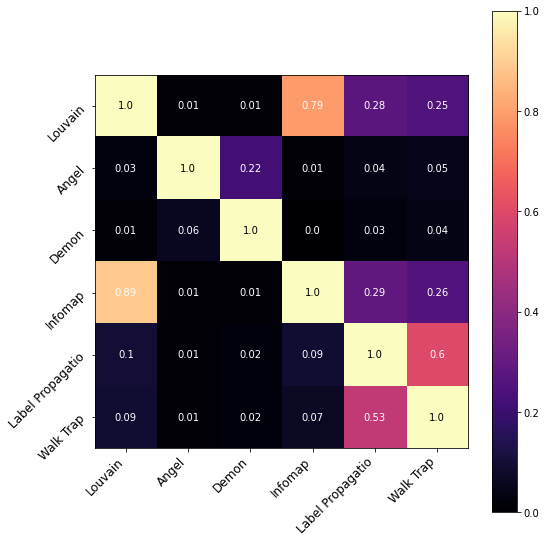

In [37]:
data = [LO_coms, AN_coms, DE_coms, IM_coms, LP_coms, WP_coms]
axes = ["Louvain","Angel", "Demon","Infomap","Label Propagatio", "Walk Trap"]
viz_heatmap(data, axes)

### > Comunities Evaluations goodness

In [11]:
final_communities_evaluation(LO_G, LO_coms, 'Louvain')
final_communities_evaluation(LP_G, LP_coms, 'Label Propagation')
final_communities_evaluation(AN_G, AN_coms, 'Angel')
final_communities_evaluation(DE_G, DE_coms, 'Demon')
final_communities_evaluation(WP_G, WP_coms, 'Walk Trap')
final_communities_evaluation(IM_G, IM_coms, 'Infomap')

Louvain
Total Node (N):	63.403
Total Inside Edge (E):	135.943
Average Internal Degree (AID): 	 1.596
Internal Density (ID): 	 0.786
Girvan-Newman Modularity (GNM): 	 0.629
Conductance (C): 	 0.038
Normalize Cut (NC): 	0.039
Triangle Participation Ratio (TPR): 	0.174

Label Propagation
Total Node (N):	20.485
Total Inside Edge (E):	51.667
Average Internal Degree (AID): 	 1.703
Internal Density (ID): 	 0.746
Girvan-Newman Modularity (GNM): 	 0.558
Conductance (C): 	 0.271
Normalize Cut (NC): 	0.272
Triangle Participation Ratio (TPR): 	0.245

Angel
Total Node (N):	164.583
Total Inside Edge (E):	839.438
Average Internal Degree (AID): 	 3.193
Internal Density (ID): 	 0.632
Girvan-Newman Modularity (GNM): 	 -0.199
Conductance (C): 	 0.327
Normalize Cut (NC): 	0.333
Triangle Participation Ratio (TPR): 	0.872

Demon
Total Node (N):	227.006
Total Inside Edge (E):	1513.229
Average Internal Degree (AID): 	 7.082
Internal Density (ID): 	 0.29
Girvan-Newman Modularity (GNM): 	 0.127
Conductance (C):

### > Numero iniziale, Numero massimo e Numero finale delle comunità durente gli snapshots

In [12]:
communities_start_max_end(LO_time_coms, 'Louvain')
communities_start_max_end(LP_time_coms, 'Label Propagation')
communities_start_max_end(AN_time_coms, 'Angel')
communities_start_max_end(DE_time_coms, 'Demon')
communities_start_max_end(WP_time_coms, 'Walk Trap')
communities_start_max_end(IM_time_coms, 'Infomap')

Louvain
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	263 
 Numero di comunità finali:	263

Label Propagation
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	851 
 Numero di comunità finali:	814

Angel
 Numero di comunità iniziali:	6 
 Numero massimo di comunità:	48 
 Numero di comunità finali:	48

Demon
 Numero di comunità iniziali:	6 
 Numero massimo di comunità:	166 
 Numero di comunità finali:	166

Walk Trap
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	898 
 Numero di comunità finali:	898

Infomap
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	238 
 Numero di comunità finali:	238



## Visualizzazioni delle evoluzioni temporali
### > Evoluzione delle comunità nel tempo

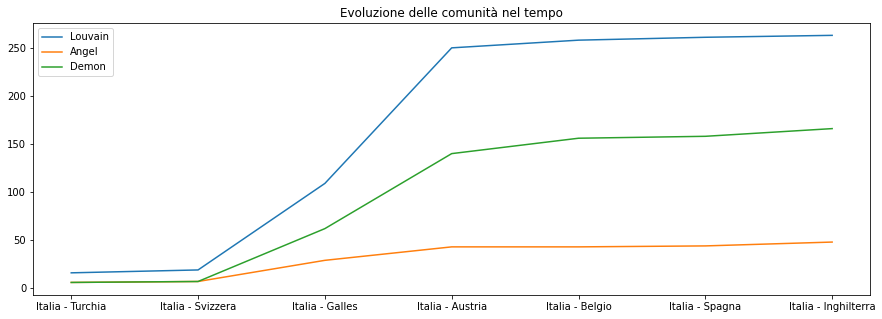

In [13]:
xAxes = ["Italia - Turchia", "Italia - Svizzera", "Italia - Galles", "Italia - Austria", "Italia - Belgio", "Italia - Spagna", "Italia - Inghilterra" ]
title = 'Evoluzione delle comunità nel tempo'
data = {
    "Louvain": LO_time_coms,
    "Angel": AN_time_coms,
    "Demon": DE_time_coms,
}
viz_linegraph(data, title, xAxes)

### > Tendenza delle comunità a restare le stesse nel tempo

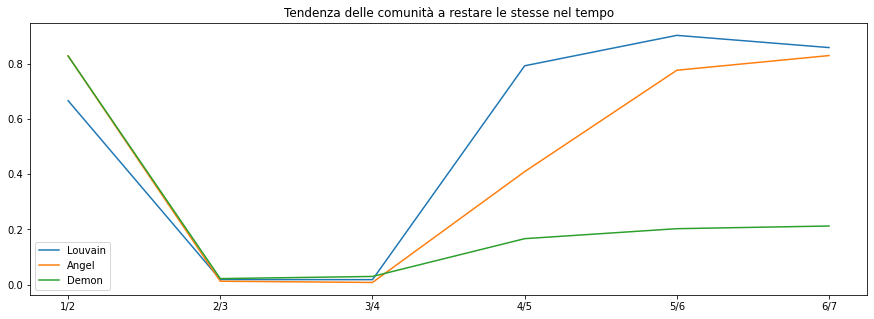

In [14]:
xAxes = ["1/2", "2/3", "3/4", "4/5", "5/6", "6/7"]
title = 'Tendenza delle comunità a restare le stesse nel tempo'
data = {
    "Louvain": LO_tc.clustering_stability_trend(evaluation.nf1),
    "Angel": AN_tc.clustering_stability_trend(evaluation.nf1),
    "Demon": DE_tc.clustering_stability_trend(evaluation.nf1),
}
viz_linegraph(data, title, xAxes)

### > Numero medio dei nodi delle comunità nel tempo

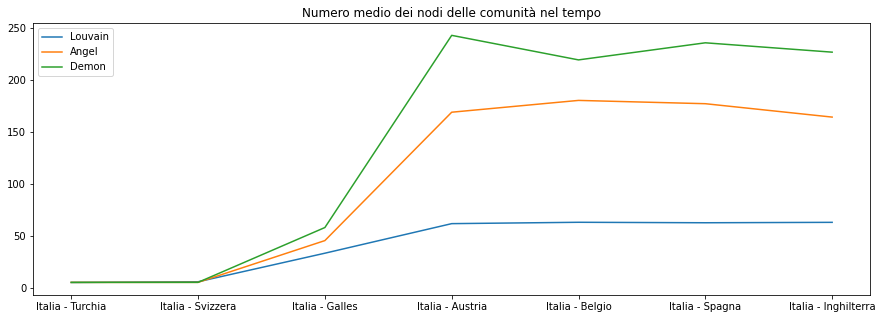

In [15]:
xAxes = ["Italia - Turchia", "Italia - Svizzera", "Italia - Galles", "Italia - Austria", "Italia - Belgio", "Italia - Spagna", "Italia - Inghilterra" ]
title = 'Numero medio dei nodi delle comunità nel tempo'
data = {
    "Louvain": LO_coms_nodes,
    "Angel": AN_coms_nodes,
    "Demon": DE_coms_nodes,
}
viz_linegraph(data, title, xAxes)

## Crescita della rete nel tempo

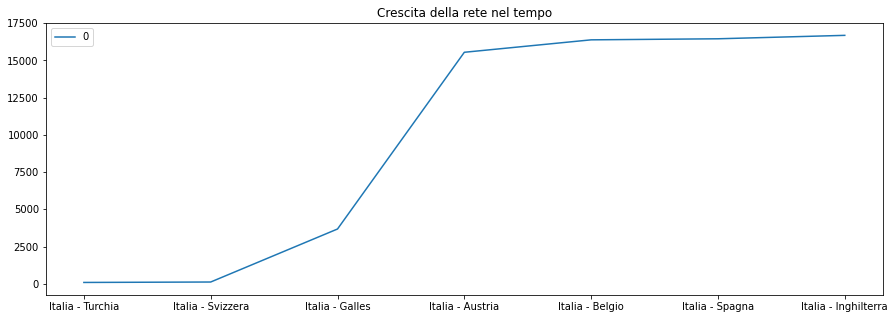

In [16]:
xAxes = ["Italia - Turchia", "Italia - Svizzera", "Italia - Galles", "Italia - Austria", "Italia - Belgio", "Italia - Spagna", "Italia - Inghilterra" ]
title = "Crescita della rete nel tempo"
viz_linegraph(net_growth, title, xAxes)